# Setup

In [1]:
!pip install pygeos

     |████████████████████████████████| 1.6MB 4.9MB/s 


In [2]:
!pip install geopandas

     |████████████████████████████████| 972kB 8.7MB/s 
     |████████████████████████████████| 14.8MB 304kB/s 
     |████████████████████████████████| 10.9MB 47.7MB/s 


In [3]:
!pip install pyrosm

     |████████████████████████████████| 2.0MB 5.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
Processing /root/.cache/pip/wheels/12/d5/09/836011d00b6e694dfade8025669266260834574f47cfe18f62/cykhash-1.0.2-cp36-cp36m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/9e/cb/085b893850110d4e20ef3624808ccaec0515c07da0400e58bdd3ca73c5e3/python_rapidjson-0.9.1-cp36-cp36m-manylinux2010_x86_64.whl
Processing /root/.cache/pip/wheels/a2/2b/e3/1800624884ba9461b903a05a809ff1c10317603a6ee8e74155/pyrobuf-0.9.3-cp36-cp36m-linux_x86_64.whl
  Created wheel for pyrosm: filename=pyrosm-0.5.3-cp36-cp36m-linux_x86_64.whl size=5013113 sha256=e091f9866eb7f330b125b121b92ea28d8f5b9d508a943f100409952749ad93b3
  Stored in directory: /root/.cache/pip/wheels/a8/ca/18/ff3b302d589113fac92b89d73c135eeb5d0c62c06ae32441e8
Successfully built pyrosm


# Exercise
- download from OpenStreetMap all supermarkets inside the bounding box of the city with this the coordinate<br/>
   latitude: 46.21209<br/>
   longitude: 11.09351
- identify the longest road of the city (state roads, walking routes, motorways are excluded). Please use "unclassified"
- How many drinking water are in this city?
- How many benches in this city have the backrest?


## download from OpenStreetMap all supermarkets inside the bounding box of the city with these coordinates


In [4]:
import geopandas as gpd

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## find the city

### method 1 - reverse geocoding

In [5]:
from geopy.geocoders import ArcGIS

In [6]:
latlon = "46.21209" + "," + "11.09351"

In [7]:
geolocator = ArcGIS(user_agent="Mozilla/5.0 (Linux; Android 10) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Mobile Safari/537.36")

In [8]:
location = geolocator.reverse(latlon)

In [9]:
city = location.raw['City']

In [10]:
city

'Mezzolombardo'

### method 2 - spatial relathion

In [11]:
from shapely.geometry import Point

In [12]:
point = Point(11.09351,46.21209)

In [13]:
!wget https://github.com/napo/geospatial_course_unitn/raw/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg

--2020-10-23 07:29:48--  https://github.com/napo/geospatial_course_unitn/raw/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg [following]
--2020-10-23 07:29:48--  https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23396352 (22M) [application/octet-stream]
Saving to: ‘istat_ad

In [14]:
municipalities = gpd.read_file("istat_administrative_units_2020.gpkg",layer="municipalities")

In [15]:
muncipality = municipalities[municipalities.to_crs(epsg=4326).geometry.contains(point)]

In [16]:
muncipality

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,geometry
3417,2,4,22,0,22,22117,022117,Mezzolombardo,None,0,"MULTIPOLYGON (((659991.073 5121616.939, 660921..."


In [17]:
city = muncipality.COMUNE.values[0]

In [18]:
city

'Mezzolombardo'

## find the boundig box of Mezzolombardo

In [19]:
from shapely.geometry import Polygon

In [20]:
municipality = municipalities[municipalities.COMUNE==city]

In [21]:
municipality.to_crs(epsg=4326).geometry.bounds

,minx,miny,maxx,maxy
3417,11.062845,46.177712,11.118754,46.231135


In [22]:
bbox = list(municipality.to_crs(epsg=4326).geometry.bounds.values[0])

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/boudingbox.png)

In [23]:
minx = bbox[0]
miny = bbox[1]
maxx = bbox[2]
maxy = bbox[3]

In [24]:
polygon = Polygon([[minx, miny], [maxx, miny], [maxx, maxy], [minx, maxy]])

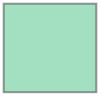

In [25]:
polygon

## download from OpenStreetMap

In [26]:
data = {'description': ['bbox around Mezzolombardo'], 'geometry': [polygon]}

In [27]:
bbox_mezzolombardo = gpd.GeoDataFrame(data,crs="epsg:4326")

In [28]:
bbox_mezzolombardo.to_file("bbox_mezzolombardo.geojson",driver="GeoJSON")

In [29]:
from google.colab import files
files.download("bbox_mezzolombardo.geojson")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## method 1 - download and cut from geodati fmach

http://www.geodati.fmach.it/italia_osm.html

http://geodati.fmach.it/gfoss_geodata/osm/output_osm_regioni/trentino-alto-adige.pbf


In [30]:
!wget http://geodati.fmach.it/gfoss_geodata/osm/output_osm_regioni/trentino-alto-adige.pbf

--2020-10-23 07:29:53--  http://geodati.fmach.it/gfoss_geodata/osm/output_osm_regioni/trentino-alto-adige.pbf
Resolving geodati.fmach.it (geodati.fmach.it)... 77.72.197.167
Connecting to geodati.fmach.it (geodati.fmach.it)|77.72.197.167|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90917416 (87M)
Saving to: ‘trentino-alto-adige.pbf’

trentino-alto-adige 100%[===================>]  86.71M  9.26MB/s    in 11s     

2020-10-23 07:30:04 (7.76 MB/s) - ‘trentino-alto-adige.pbf’ saved [90917416/90917416]



In [31]:
path_pbf_file_big = "/content/trentino-alto-adige.pbf"

## method 2 - download from export.hotosm.org

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/export_hostosm_mezzolombardo.png)

In [32]:
!wget https://github.com/napo/geospatial_course_unitn/raw/master/data/openstreetmap/mezzolombardo_bbox.osm.pbf

--2020-10-23 07:30:04--  https://github.com/napo/geospatial_course_unitn/raw/master/data/openstreetmap/mezzolombardo_bbox.osm.pbf
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/mezzolombardo_bbox.osm.pbf [following]
--2020-10-23 07:30:04--  https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/mezzolombardo_bbox.osm.pbf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978912 (956K) [application/octet-stream]
Saving to: ‘mezzolombardo_bbox.osm.pbf’

mezzolombardo_bbox. 100%[===================>] 955.97K  --.-KB/s

In [33]:
path_pbf_file = "mezzolombardo_bbox.osm.pbf"

## find all the supermarkets in the area



In [34]:
import pyrosm

/usr/local/lib/python3.6/dist-packages/pyrosm/utils/_compat.py:12: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). The tool will work but it runs a bit slower.
  shapely_geos_version, geos_capi_version_string


![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/tag_supermarket.png)

In [35]:
osm = pyrosm.OSM(path_pbf_file,bounding_box=bbox)

In [36]:
custom_filter = {'shop': ['supermarket']}

In [37]:
supermarkets = osm.get_pois(custom_filter=custom_filter)

In [38]:
supermarkets.shape

(8, 19)

In [39]:
print("there are %s supermarkets" % supermarkets.shape[0])

there are 8 supermarkets


In [40]:
supermarkets.name

0    Iper Soap
1    Schlecker
2       Despar
3     EuroSpin
4        Conad
5        Orvea
6        Amort
7         LIDL
Name: name, dtype: object

# identify the longest road of the city


In [41]:
roads = osm.get_network(network_type='all')

In [42]:
roads.columns

Index(['access', 'area', 'bicycle', 'bridge', 'cycleway', 'foot', 'footway',
       'highway', 'int_ref', 'junction', 'lanes', 'lit', 'maxspeed',
       'motor_vehicle', 'name', 'oneway', 'ref', 'service', 'segregated',
       'smoothness', 'surface', 'tracktype', 'tunnel', 'width', 'id',
       'timestamp', 'version', 'tags', 'geometry', 'osm_type'],
      dtype='object')

In [43]:
roads.highway.unique()

array(['motorway', 'tertiary', 'residential', 'unclassified', 'track',
       'primary', 'secondary', 'cycleway', 'tertiary_link', 'footway',
       'path', 'service', 'steps', 'primary_link', 'pedestrian',
       'secondary_link', 'via_ferrata'], dtype=object)

![](https://github.com/napo/geospatial_course_unitn/raw/master/images/tag_highways.gif)

## lenght of unclassified and residential togheter

In [44]:
roads_unclassified = roads[(roads.highway=='unclassified') | (roads.highway == 'residential')]

In [45]:
roads_unclassified['name'].value_counts()

Via Damiano Chiesa         8
Via dei Morei              7
Piazza della Chiesa        5
Via alla Grotta            5
Via Carlo Devigili         5
                          ..
Via Conte Carlo Martini    1
Via Cavalleggeri Udine     1
Via degli Alpini           1
Via Guido Fiorini          1
Via al Belvedere           1
Name: name, Length: 70, dtype: int64

In [46]:
names = roads_unclassified.name.unique()

In [47]:
roads_lenght = {}
rodas_in_meters = roads_unclassified.to_crs(epsg=32632)
for name in names:
  road = rodas_in_meters[rodas_in_meters.name==name]
  road_lenght = road.length.sum()
  roads_lenght[name] = road_lenght


In [48]:
roads_lenght

{'Corso Giuseppe Mazzini': 249.7579935275893,
 'Corso del Popolo': 235.021292582283,
 None: 0.0,
 'Piazza Cassa di Risparmio': 101.69215459438668,
 'Piazza Cesare Battisti': 103.70389536670257,
 'Piazza Luigi Dalpiaz': 46.95951436559089,
 'Piazza Pio XII': 244.72762778937602,
 'Piazza San Giovanni': 243.40400521661013,
 'Piazza della Chiesa': 123.76304437105432,
 'Piazza delle Erbe': 331.4274049761924,
 'Strada delle Palù': 144.0046947780986,
 'Via Alessandro Manzoni': 144.3589083543954,
 'Via Arturo De Varda': 274.9059635268403,
 'Via Bertagnolli': 339.42906670938265,
 'Via Camorzi': 125.38773228061129,
 'Via Canevarie': 264.79016895271434,
 'Via Carlo Devigili': 1410.4261234546225,
 'Via Cavalleggeri Udine': 444.7088078668066,
 'Via Conte Carlo Martini': 286.77891249144983,
 'Via Cortalta': 65.66625197808622,
 'Via Cristiani': 911.3802270676734,
 'Via Damiano Chiesa': 1306.158838946422,
 'Via Dante': 139.4356449287226,
 'Via Dante Alighieri': 172.1078302300374,
 'Via Desiderio Reich'

In [49]:
max(roads_lenght, key=roads_lenght.get)

'Via Trento'

In [50]:
longest_road = max(roads_lenght, key=roads_lenght.get)

In [51]:
print("the longest road (unclassified + residential) is %s and is long %s meters" % (str(longest_road),roads_lenght[longest_road ]))

the longest road (unclassified + residential) is Via Trento and is long 1479.2922178941203 meters


## the case only with unclassified

In [52]:
roads_unclassified = roads[(roads.highway=='unclassified')] 

In [53]:
names = roads_unclassified.name.unique()

In [54]:
roads_lenght = {}
rodas_in_meters = roads_unclassified.to_crs(epsg=32632)
for name in names:
  road = rodas_in_meters[rodas_in_meters.name==name]
  road_lenght = road.length.sum()
  roads_lenght[name] = road_lenght

In [55]:
longest_road = max(roads_lenght, key=roads_lenght.get)

In [56]:
print("the longest road (unclassified + residential) is %s and is long %s meters" % (str(longest_road),roads_lenght[longest_road ]))

the longest road (unclassified + residential) is Via Trento and is long 1479.2922178941203 meters


## where are these roads?
... we can use overpass-turbo.eu with this wizard query

```
name='Via Trento' or name='Via Carlo Devigili' in Mezzolombardo
```

http://overpass-turbo.eu/s/Z7O 


![](https://github.com/napo/geospatial_course_unitn/raw/master/images/roads_lenght_mezzolombardo.gif)

# How many drinking water are in this city?

In [57]:
custom_filter = {'amenity': ['drinking_water']}

In [58]:
drinking_water = osm.get_pois(custom_filter=custom_filter)

/usr/local/lib/python3.6/dist-packages/pyrosm/pyrosm.py:513: UserWarning: Could not find any POIs for given area.
  self.bounding_box)


In [60]:
drinking_water.amenity.unique()

AttributeError: ignored

??? no drinking_water? <br/>
Maybe it's an error on the source file.<br/>
We can try we the other source

In [61]:
osm = pyrosm.OSM(path_pbf_file_big,bounding_box=bbox)

In [62]:
drinking_water = osm.get_pois(custom_filter=custom_filter)

In [63]:
drinking_water.shape

(29, 12)

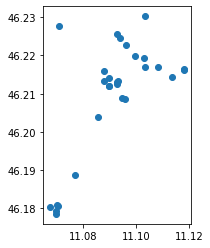

In [64]:
drinking_water.plot()

# How many benches in this city have the backrest?

In [65]:
custom_filter = {'amenity': ['bench']}

In [66]:
benchs = osm.get_pois(custom_filter=custom_filter)

In [67]:
benchs.shape

(132, 10)

In [78]:
benchs.head(3)

,id,lon,tags,changeset,lat,timestamp,version,amenity,geometry,osm_type
0,867538748,11.118477,"{""backrest"":""yes""}",0,46.214172,-15,0,bench,POINT (11.11848 46.21417),node
1,869332616,11.118519,"{""backrest"":""yes""}",0,46.214302,30,0,bench,POINT (11.11852 46.21430),node
2,869333157,11.118433,"{""backrest"":""yes""}",-99,46.214287,25,-99,bench,POINT (11.11843 46.21429),node


In [77]:
benchs[benchs.tags.isin(['{"backrest":"yes"}'])].shape

(0, 10)